In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation

In [11]:
DIRECTORY=r"/content/drive/MyDrive/final set"
CATAGORIES=['fracture','non-fractured']

In [12]:
data=[]

for catagories in CATAGORIES:
    folder=os.path.join(DIRECTORY,catagories)
    label=CATAGORIES.index(catagories)


    for img in os.listdir(folder):
        img=os.path.join(folder,img)
        image_array=cv2.imread(img,cv2.IMREAD_GRAYSCALE)
        resized_image=cv2.resize(image_array,(256,256))
        data.append([resized_image,label])


In [13]:
data

[[array([[104, 102,  99, ...,  73,  71,  72],
         [101, 100,  99, ...,  70,  70,  68],
         [101, 101,  98, ...,  69,  70,  70],
         ...,
         [128, 129, 129, ...,  92,  90,  89],
         [128, 130, 128, ...,  92,  90,  91],
         [133, 131, 130, ...,  94,  93,  93]], dtype=uint8),
  0],
 [array([[47, 47, 46, ..., 44, 47, 43],
         [45, 44, 44, ..., 45, 45, 42],
         [44, 39, 40, ..., 45, 40, 43],
         ...,
         [64, 66, 61, ..., 31, 34, 33],
         [70, 64, 64, ..., 36, 35, 34],
         [70, 69, 68, ..., 35, 36, 33]], dtype=uint8),
  0],
 [array([[ 71,  71,  69, ...,  53,  53,  54],
         [ 69,  73,  71, ...,  54,  52,  55],
         [ 69,  67,  68, ...,  52,  49,  47],
         ...,
         [100, 101, 101, ...,  68,  70,  67],
         [104, 105, 101, ...,  71,  72,  72],
         [107, 105, 103, ...,  78,  77,  77]], dtype=uint8),
  0],
 [array([[31, 31, 29, ..., 41, 44, 43],
         [32, 31, 32, ..., 42, 41, 42],
         [29, 30, 29, .

In [14]:
random.shuffle(data)

In [15]:
x=[]
y=[]
for fetures,label in data:
    x.append(fetures)
    y.append(label)

In [16]:
x=np.array(x)
y=np.array(y)

In [17]:
x

array([[[ 29,  29,  29, ..., 234, 234, 234],
        [ 29,  29,  29, ..., 234, 234, 234],
        [ 29,  29,  29, ..., 234, 234, 234],
        ...,
        [ 30,  30,  29, ..., 231, 231, 232],
        [ 31,  31,  31, ..., 231, 232, 232],
        [ 30,  31,  32, ..., 232, 232, 233]],

       [[  1,   0,  22, ...,   3,   0,  58],
        [  1,   1,  17, ...,   1,   3,   5],
        [  1,   0,  11, ...,   1,   1,   1],
        ...,
        [  2,   8,   4, ...,   1,   0,  18],
        [  2,  10,   4, ...,   2,   1,   6],
        [  0,  13,   6, ...,   2,   0,   1]],

       [[  0,   1,   1, ...,  20,  20,  20],
        [  0,   1,   1, ...,  19,  19,  19],
        [  2,   1,   0, ...,  19,  19,  19],
        ...,
        [ 32,  24,  20, ...,  18,  10,   2],
        [ 35,  25,  22, ...,  14,  12,   3],
        [ 33,  25,  24, ...,  14,   7,   9]],

       ...,

       [[  1,   1,   1, ..., 163, 182, 215],
        [  1,   1,   1, ..., 165, 151, 171],
        [  1,   1,   1, ..., 161, 155, 160

In [18]:
x.shape

(1008, 256, 256)

In [19]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [20]:
# Configure GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, EarlyStopping

model = Sequential()

# Adjust input shape to (256, 256, 1) for grayscale images
model.add(Conv2D(128, (3, 3), input_shape=(256, 256, 1), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

# Add more dense layers with dropout and batch normalization
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

# Learning rate scheduler
def lr_schedule(epoch):
    lr = 0.0001
    if epoch > 50:
        lr *= 0.1
    return lr

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
lr_scheduler = LearningRateScheduler(lr_schedule)

# Early stopping
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 256)     295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 512)       1180160   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 512)      0

In [22]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Epoch 1/5
41/41 [==============================] - 36s 309ms/step - loss: 1.3757 - accuracy: 0.6973 - val_loss: 11.9081 - val_accuracy: 0.4010
Epoch 2/5
41/41 [==============================] - 10s 254ms/step - loss: 1.0165 - accuracy: 0.7990 - val_loss: 4.7170 - val_accuracy: 0.4703
Epoch 3/5
41/41 [==============================] - 10s 256ms/step - loss: 0.9731 - accuracy: 0.8040 - val_loss: 2.4783 - val_accuracy: 0.5891
Epoch 4/5
41/41 [==============================] - 11s 257ms/step - loss: 0.8540 - accuracy: 0.8375 - val_loss: 1.5452 - val_accuracy: 0.6832
Epoch 5/5
41/41 [==============================] - 11s 258ms/step - loss: 0.8156 - accuracy: 0.8226 - val_loss: 1.1564 - val_accuracy: 0.7475


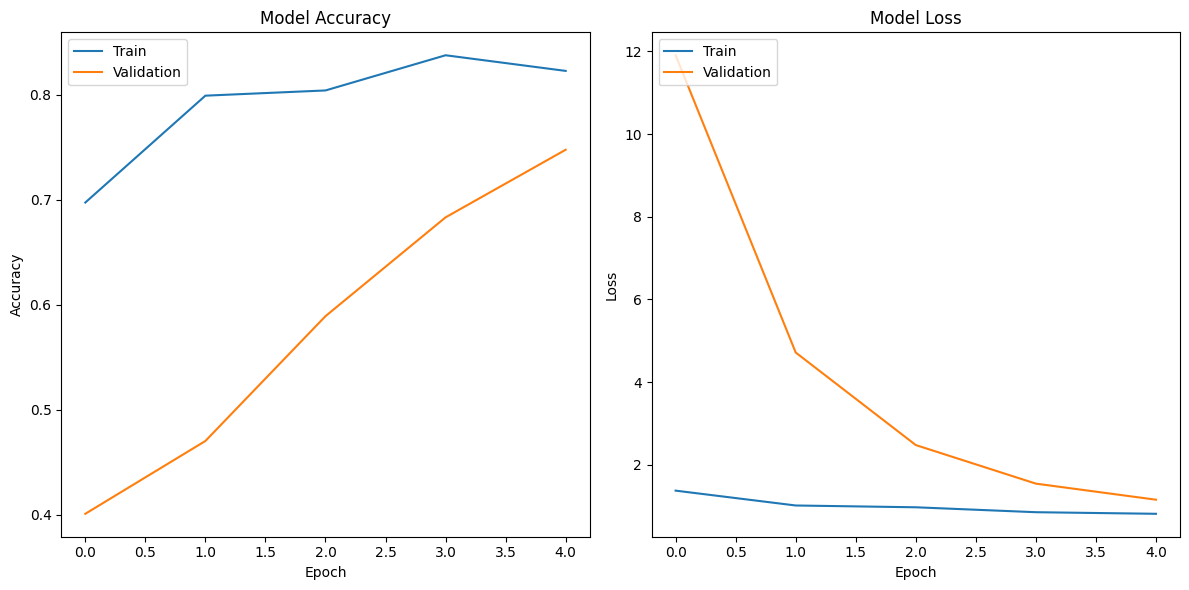

In [23]:
history=model.fit(x,y,epochs=5,batch_size=20,validation_split=0.2)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

densenet

In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model


In [65]:
image_size = (256, 256)
batch_size = 32
data_directory = '/content/drive/MyDrive/final set'
categories = ['fracture', 'non-fractured']


In [66]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    classes=categories,
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    classes=categories,
    subset='validation'
)


Found 807 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [67]:
base_model = DenseNet121(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
num_epochs = 5

history = model.fit(train_generator,
                    epochs=num_epochs,
                    validation_data=validation_generator)


Epoch 1/5
26/26 [==============================] - 38s 1s/step - loss: 0.7806 - accuracy: 0.6233 - val_loss: 0.5739 - val_accuracy: 0.6468
Epoch 2/5
26/26 [==============================] - 23s 891ms/step - loss: 0.5244 - accuracy: 0.7955 - val_loss: 0.5555 - val_accuracy: 0.6667
Epoch 3/5
26/26 [==============================] - 26s 1s/step - loss: 0.4940 - accuracy: 0.8005 - val_loss: 0.4158 - val_accuracy: 0.8159
Epoch 4/5
26/26 [==============================] - 25s 968ms/step - loss: 0.4177 - accuracy: 0.8278 - val_loss: 0.4224 - val_accuracy: 0.7960
Epoch 5/5
18/26 [===================>..........] - ETA: 5s - loss: 0.3436 - accuracy: 0.8584

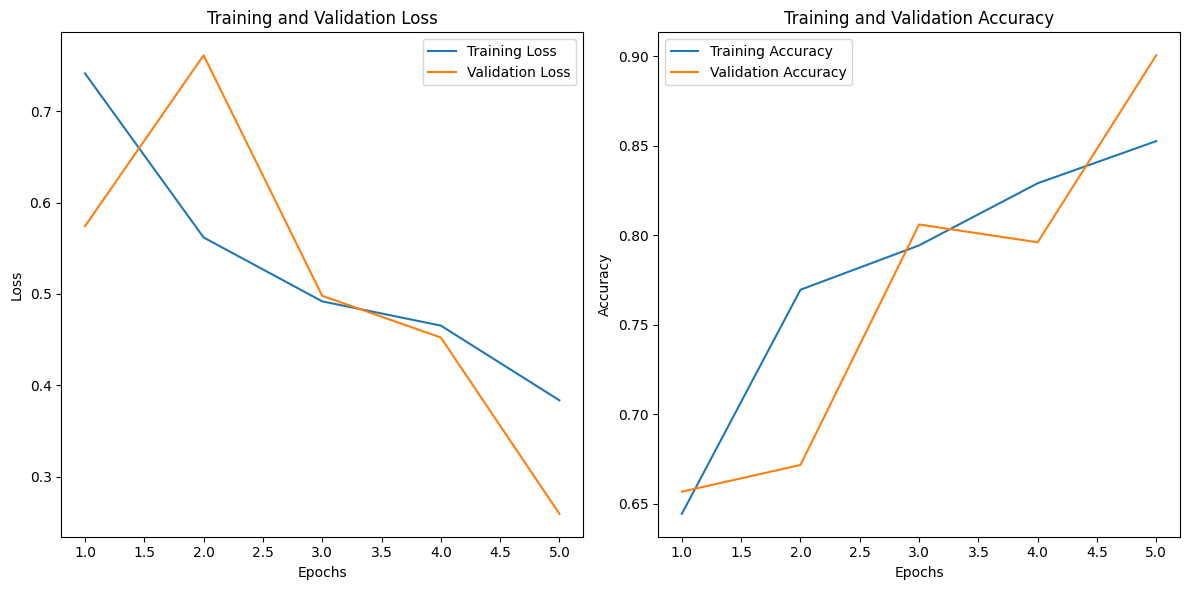

In [64]:
import matplotlib.pyplot as plt

# Extract training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
